In [0]:
pip install --upgrade pandas

Python interpreter will be restarted.
Collecting pandas
 Downloading pandas-1.2.3-cp37-cp37m-manylinux1_x86_64.whl (9.9 MB)
Requirement already satisfied, skipping upgrade: python-dateutil>=2.7.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages (from pandas) (2.8.1)
Requirement already satisfied, skipping upgrade: numpy>=1.16.5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages (from pandas) (1.18.1)
Requirement already satisfied, skipping upgrade: pytz>=2017.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages (from pandas) (2019.3)
Requirement already satisfied, skipping upgrade: six>=1.5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages (from python-dateutil>=2.7.3->pandas) (1.14.0)
ERROR: petastorm 0.9.7 requires pyspark>=2.1.0, which is not installed.
ERROR: mlflow 1.12.1 requires alembic<=1.4.1, which is not installed.
ERROR: mlflow 1.12.1 requires prometheus-flask-exporter, which is not installed.
ERROR: mlflow 1.12.1 requires sqlalchemy, which is not installed.
Installing collected packages: pandas
 Attempting uninstall: pandas
 Found existing installation: pandas 1.0.1
 Uninstalling pandas-1.0.1:
 Successfully uninstalled pandas-1.0.1
Successfully installed pandas-1.2.3
Python interpreter will be restarted.

In [0]:
import lifetimes
import xlrd
import nbconvert
import pandas as pd
import openpyxl
import numpy as np

In [0]:
xlsx_filename = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

In [0]:
orders_schema = {
  'InvoiceNo':np.str,
  'StockCode':np.str,
  'Description':np.str,
  'Quantity':np.int64,
  'InvoiceDate':np.datetime64,
  'UnitPrice':np.float64,
  'CustomerID':np.str,
  'Country':np.str  
  }

# read spreadsheet to pandas dataframe
# the xlrd library must be installed for this step to work 
orders_pd = pd.read_excel(
  xlsx_filename,
  sheet_name='Online Retail',
  header=0, # first row is header
  dtype=orders_schema
  )

# display first few rows from the dataset
orders_pd.head(10)

Out[5]:

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [0]:
# convert pandas DF to Spark DF
#orders = spark.read.format("com.crealytics.spark.excel").option("location", "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")

spark.conf.set("spark.sql.execution.arrow.enabled", "true")
orders = spark.createDataFrame(orders_pd)
# present Spark DF as queriable view
orders.createOrReplaceTempView('orders') 

In [0]:
%sql -- unique transactions by date

SELECT 
  TO_DATE(InvoiceDate) as InvoiceDate,
  COUNT(DISTINCT InvoiceNo) as Transactions
FROM orders
GROUP BY TO_DATE(InvoiceDate)
ORDER BY InvoiceDate;

InvoiceDate,Transactions
2010-12-01,143
2010-12-02,167
2010-12-03,108
2010-12-05,95
2010-12-06,133
2010-12-07,111
2010-12-08,148
2010-12-09,183
2010-12-10,91
2010-12-12,51


In [0]:
#3
import lifetimes

# set the last transaction date as the end point for this historical dataset
current_date = orders_pd['InvoiceDate'].max()

# calculate the required customer metrics
metrics_pd = (
  lifetimes.utils.summary_data_from_transaction_data(
    orders_pd,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date, 
    freq='D'
    )
  )

# display first few rows
metrics_pd.head(10)



Out[7]:

,frequency,recency,T
CustomerID,,,
12346,0.0,0.0,325.0
12347,6.0,365.0,367.0
12348,3.0,283.0,358.0
12349,0.0,0.0,18.0
12350,0.0,0.0,310.0
12352,6.0,260.0,296.0
12353,0.0,0.0,204.0
12354,0.0,0.0,232.0
12355,0.0,0.0,214.0


In [0]:
# sql statement to derive summary customer stats
sql = '''
  SELECT
    a.customerid as CustomerID,
    CAST(COUNT(DISTINCT a.transaction_at) - 1 as float) as frequency,
    CAST(DATEDIFF(MAX(a.transaction_at), a.first_at) as float) as recency,
    CAST(DATEDIFF(a.current_dt, a.first_at) as float) as T
  FROM ( -- customer order history
    SELECT DISTINCT
      x.customerid,
      z.first_at,
      TO_DATE(x.invoicedate) as transaction_at,
      y.current_dt
    FROM orders x
    CROSS JOIN (SELECT MAX(TO_DATE(invoicedate)) as current_dt FROM orders) y                                -- current date (according to dataset)
    INNER JOIN (SELECT customerid, MIN(TO_DATE(invoicedate)) as first_at FROM orders GROUP BY customerid) z  -- first order per customer
      ON x.customerid=z.customerid
    WHERE x.customerid IS NOT NULL
    ) a
  GROUP BY a.customerid, a.current_dt, a.first_at
  ORDER BY CustomerID
  '''

# capture stats in dataframe 
metrics_sql = spark.sql(sql)

# display stats
display(metrics_sql)  

CustomerID,frequency,recency,T
12346,0.0,0.0,325.0
12347,6.0,365.0,367.0
12348,3.0,283.0,358.0
12349,0.0,0.0,18.0
12350,0.0,0.0,310.0
12352,6.0,260.0,296.0
12353,0.0,0.0,204.0
12354,0.0,0.0,232.0
12355,0.0,0.0,214.0
12356,2.0,303.0,325.0


In [0]:
from pyspark.sql.functions import to_date, datediff, max, min, countDistinct, count, sum, when
from pyspark.sql.types import *

# valid customer orders
x = orders.where(orders.CustomerID.isNotNull())

# calculate last date in dataset
y = (
  orders
    .groupBy()
    .agg(max(to_date(orders.InvoiceDate)).alias('current_dt'))
  )

# calculate first transaction date by customer
z = (
  orders
    .groupBy(orders.CustomerID)
    .agg(min(to_date(orders.InvoiceDate)).alias('first_at'))
  )

# combine customer history with date info 
a = (x
    .crossJoin(y)
    .join(z, x.CustomerID==z.CustomerID, how='inner')
    .select(
      x.CustomerID.alias('customerid'), 
      z.first_at, 
      to_date(x.InvoiceDate).alias('transaction_at'), 
      y.current_dt
      )
     .distinct()
    )

# calculate relevant metrics by customer
metrics_api = (a
           .groupBy(a.customerid, a.current_dt, a.first_at)
           .agg(
             (countDistinct(a.transaction_at)-1).cast(FloatType()).alias('frequency'),
             datediff(max(a.transaction_at), a.first_at).cast(FloatType()).alias('recency'),
             datediff(a.current_dt, a.first_at).cast(FloatType()).alias('T')
             )
           .select('customerid','frequency','recency','T')
           .orderBy('customerid')
          )

display(metrics_api)

customerid,frequency,recency,T
12346,0.0,0.0,325.0
12347,6.0,365.0,367.0
12348,3.0,283.0,358.0
12349,0.0,0.0,18.0
12350,0.0,0.0,310.0
12352,6.0,260.0,296.0
12353,0.0,0.0,204.0
12354,0.0,0.0,232.0
12355,0.0,0.0,214.0
12356,2.0,303.0,325.0


In [0]:
# summary data from lifetimes
metrics_pd.describe()

Out[10]:

,frequency,recency,T
count,4372.000000,4372.000000,4372.000000
mean,3.413541,133.723010,225.304209
std,6.674343,133.000474,118.384168
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,115.000000
50%,1.000000,98.000000,253.000000
75%,4.000000,256.000000,331.000000
max,145.000000,373.000000,373.000000


In [0]:
# summary data from SQL statement
metrics_sql.toPandas().describe()

Out[11]:

,frequency,recency,T
count,4372.000000,4372.000000,4372.000000
mean,3.413541,133.723007,225.304214
std,6.674344,133.000473,118.384171
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,115.000000
50%,1.000000,98.000000,253.000000
75%,4.000000,256.000000,331.000000
max,145.000000,373.000000,373.000000


In [0]:
# summary data from pyspark.sql API
metrics_api.toPandas().describe()

Out[12]:

,frequency,recency,T
count,4372.000000,4372.000000,4372.000000
mean,3.413541,133.723007,225.304214
std,6.674344,133.000473,118.384171
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,115.000000
50%,1.000000,98.000000,253.000000
75%,4.000000,256.000000,331.000000
max,145.000000,373.000000,373.000000


In [0]:
# define a notebook parameter making holdout days configurable (90-days default)
dbutils.widgets.text('holdout days', '90')

In [0]:
from datetime import timedelta

# set the last transaction date as the end point for this historical dataset
current_date = orders_pd['InvoiceDate'].max()

# define end of calibration period
holdout_days = int(dbutils.widgets.get('holdout days'))
calibration_end_date = current_date - timedelta(days = holdout_days)

# calculate the required customer metrics
metrics_cal_pd = (
  lifetimes.utils.calibration_and_holdout_data(
    orders_pd,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date,
    calibration_period_end=calibration_end_date,
    freq='D'    
    )
  )

# display first few rows
metrics_cal_pd.head(10)

Out[26]:

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346,0.0,0.0,235.0,0.0,<90 * Days>
12347,4.0,238.0,277.0,2.0,<90 * Days>
12348,2.0,110.0,268.0,1.0,<90 * Days>
12350,0.0,0.0,220.0,0.0,<90 * Days>
12352,3.0,34.0,206.0,3.0,<90 * Days>
12353,0.0,0.0,114.0,0.0,<90 * Days>
12354,0.0,0.0,142.0,0.0,<90 * Days>
12355,0.0,0.0,124.0,0.0,<90 * Days>
12356,1.0,80.0,235.0,1.0,<90 * Days>


In [0]:
from pyspark.sql.functions import avg, date_sub, coalesce, lit, expr

# valid customer orders
x = orders.where(orders.CustomerID.isNotNull())

# calculate last date in dataset
y = (
  orders
    .groupBy()
    .agg(max(to_date(orders.InvoiceDate)).alias('current_dt'))
  )

# calculate first transaction date by customer
z = (
  orders
    .groupBy(orders.CustomerID)
    .agg(min(to_date(orders.InvoiceDate)).alias('first_at'))
  )

# combine customer history with date info (CUSTOMER HISTORY)
p = (x
    .crossJoin(y)
    .join(z, x.CustomerID==z.CustomerID, how='inner')
    .withColumn('duration_holdout', lit(int(dbutils.widgets.get('holdout days'))))
    .select(
      x.CustomerID.alias('customerid'),
      z.first_at, 
      to_date(x.InvoiceDate).alias('transaction_at'), 
      y.current_dt, 
      'duration_holdout'
      )
     .distinct()
    )

# calculate relevant metrics by customer
# note: date_sub requires a single integer value unless employed within an expr() call
a = (p
       .where(p.transaction_at < expr('date_sub(current_dt, duration_holdout)')) 
       .groupBy(p.customerid, p.current_dt, p.duration_holdout, p.first_at)
       .agg(
         (countDistinct(p.transaction_at)-1).cast(FloatType()).alias('frequency_cal'),
         datediff( max(p.transaction_at), p.first_at).cast(FloatType()).alias('recency_cal'),
         datediff( expr('date_sub(current_dt, duration_holdout)'), p.first_at).cast(FloatType()).alias('T_cal')
       )
    )

b = (p
      .where((p.transaction_at >= expr('date_sub(current_dt, duration_holdout)')) & (p.transaction_at <= p.current_dt) )
      .groupBy(p.customerid)
      .agg(
        countDistinct(p.transaction_at).cast(FloatType()).alias('frequency_holdout')
        )
   )

metrics_cal_api = (a
                 .join(b, a.customerid==b.customerid, how='left')
                 .select(
                   a.customerid.alias('CustomerID'),
                   a.frequency_cal,
                   a.recency_cal,
                   a.T_cal,
                   coalesce(b.frequency_holdout, lit(0.0)).alias('frequency_holdout'),
                   a.duration_holdout
                   )
                 .orderBy('CustomerID')
              )

display(metrics_cal_api)

CustomerID,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
12346,0.0,0.0,235.0,0.0,90
12347,4.0,238.0,277.0,2.0,90
12348,2.0,110.0,268.0,1.0,90
12350,0.0,0.0,220.0,0.0,90
12352,3.0,34.0,206.0,3.0,90
12353,0.0,0.0,114.0,0.0,90
12354,0.0,0.0,142.0,0.0,90
12355,0.0,0.0,124.0,0.0,90
12356,1.0,80.0,235.0,1.0,90
12358,0.0,0.0,60.0,1.0,90


In [0]:
# summary data from lifetimes
metrics_cal_pd.describe()

Out[31]:

,frequency_cal,recency_cal,T_cal,frequency_holdout
count,3412.000000,3412.000000,3412.000000,3412.000000
mean,2.677608,90.587046,185.041618,1.502345
std,5.222838,96.077761,80.771943,2.495318
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,125.000000,0.000000
50%,1.000000,59.500000,197.000000,1.000000
75%,3.000000,175.000000,268.000000,2.000000
max,93.000000,282.000000,283.000000,52.000000


In [0]:
# summary data from SQL statement
metrics_cal_api.toPandas().describe()

Out[33]:

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.0
mean,2.677608,90.587044,185.041611,1.502345,90.0
std,5.222837,96.077766,80.771942,2.495318,0.0
min,0.000000,0.000000,1.000000,0.000000,90.0
25%,0.000000,0.000000,125.000000,0.000000,90.0
50%,1.000000,59.500000,197.000000,1.000000,90.0
75%,3.000000,175.000000,268.000000,2.000000,90.0
max,93.000000,282.000000,283.000000,52.000000,90.0


In [0]:
# remove customers with no repeats (complete dataset)
filtered_pd = metrics_pd[metrics_pd['frequency'] > 0]
filtered = metrics_api.where(metrics_api.frequency > 0)

## remove customers with no repeats in calibration period
filtered_cal_pd = metrics_cal_pd[metrics_cal_pd['frequency_cal'] > 0]
filtered_cal = metrics_cal_api.where(metrics_cal_api.frequency_cal > 0)

In [0]:
#4
from lifetimes.fitters.pareto_nbd_fitter import ParetoNBDFitter
from lifetimes.fitters.beta_geo_fitter import BetaGeoFitter

# load spark dataframe to pandas dataframe
input_pd = filtered_cal.toPandas()

# fit a model
model = ParetoNBDFitter(penalizer_coef=0.0)
model.fit( input_pd['frequency_cal'], input_pd['recency_cal'], input_pd['T_cal'])


Out[35]: <lifetimes.ParetoNBDFitter: fitted with 2163 subjects, alpha: 96.87, beta: 936.77, r: 1.99, s: 0.27>

In [0]:
# get predicted frequency during holdout period
frequency_holdout_predicted = model.predict( input_pd['duration_holdout'], input_pd['frequency_cal'], input_pd['recency_cal'], input_pd['T_cal'])

# get actual frequency during holdout period
frequency_holdout_actual = input_pd['frequency_holdout']

/local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
 return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

In [0]:
import numpy as np

def score_model(actuals, predicted, metric='mse'):
  # make sure metric name is lower case
  metric = metric.lower()
  
  # Mean Squared Error and Root Mean Squared Error
  if metric=='mse' or metric=='rmse':
    val = np.sum(np.square(actuals-predicted))/actuals.shape[0]
    if metric=='rmse':
        val = np.sqrt(val)
  
  # Mean Absolute Error
  elif metric=='mae':
    np.sum(np.abs(actuals-predicted))/actuals.shape[0]
  
  else:
    val = None
  
  return val

# score the model
print('MSE: {0}'.format(score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')))

MSE: 3.481142186019258

In [0]:
from hyperopt import hp, fmin, tpe, rand, SparkTrials, STATUS_OK, STATUS_FAIL, space_eval

# define search space
search_space = hp.choice('model_type',[
                  {'type':'Pareto/NBD', 'l2':hp.uniform('pareto_nbd_l2', 0.0, 1.0)},
                  {'type':'BG/NBD'    , 'l2':hp.uniform('bg_nbd_l2', 0.0, 1.0)}  
                  ]
                )

# define function for model evaluation
def evaluate_model(params):
  
  # accesss replicated input_pd dataframe
  data = inputs.value
  
  # retrieve incoming parameters
  model_type = params['type']
  l2_reg = params['l2']
  
  # instantiate and configure the model
  if model_type == 'BG/NBD':
    model = BetaGeoFitter(penalizer_coef=l2_reg)
  elif model_type == 'Pareto/NBD':
    model = ParetoNBDFitter(penalizer_coef=l2_reg)
  else:
    return {'loss': None, 'status': STATUS_FAIL}
  
  # fit the model
  model.fit(data['frequency_cal'], data['recency_cal'], data['T_cal'])
  
  # evaluate the model
  frequency_holdout_actual = data['frequency_holdout']
  frequency_holdout_predicted = model.predict(data['duration_holdout'], data['frequency_cal'], data['recency_cal'], data['T_cal'])
  mse = score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')
  
  # return score and status
  return {'loss': mse, 'status': STATUS_OK}



In [0]:
import mlflow

# replicate input_pd dataframe to workers in Spark cluster
inputs = sc.broadcast(input_pd)

# configure hyperopt settings to distribute to all executors on workers
spark_trials = SparkTrials(parallelism=2)

# select optimization algorithm
algo = tpe.suggest

# perform hyperparameter tuning (logging iterations to mlflow)
argmin = fmin(
  fn=evaluate_model,
  space=search_space,
  algo=algo,
  max_evals=100,
  trials=spark_trials
  )

# release the broadcast dataset
inputs.unpersist()

Hyperopt with SparkTrials will automatically track trials in MLflow. To view the MLflow experiment associated with the notebook, click the 'Runs' icon in the notebook context bar on the upper right. There, you can view all runs.
To view logs from trials, please check the Spark executor logs. To view executor logs, expand 'Spark Jobs' above until you see the (i) icon next to the stage from the trial job. Click it and find the list of tasks. Click the 'stderr' link for a task to view trial logs.
 0%| | 0/100 [00:00<?, ?trial/s, best loss=?]trial task 0 failed, exception is Cannot apply ufunc <ufunc 'hyp2f1'> to mixed DataFrame and Series inputs..
 Traceback (most recent call last):
 File "/databricks/.python_edge_libs/hyperopt/spark.py", line 540, in run_task_on_executor
 result = domain.evaluate(params, ctrl=None, attach_attachments=False)
 File "/databricks/.python_edge_libs/hyperopt/base.py", line 892, in evaluate
 rval = self.fn(pyll_rval)
 File "<command-3585370241997192>", line 33, in evaluate_model
 File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages/lifetimes/fitters/pareto_nbd_fitter.py", line 225, in conditional_expected_number_of_purchases_up_to_time
 likelihood = self._conditional_log_likelihood(params, x, t_x, T)
 File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages/lifetimes/fitters/pareto_nbd_fitter.py", line 178, in _conditional_log_likelihood
 log_A_0 = ParetoNBDFitter._log_A_0(params, x, rec, T)
 File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages/lifetimes/fitters/pareto_nbd_fitter.py", line 153, in _log_A_0
 (max_of_alpha_beta + recency))
 File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages/pandas/core/generic.py", line 1936, in __array_ufunc__
 return arraylike.array_ufunc(self, ufunc, method, *inputs, **kwargs)
 File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages/pandas/core/arraylike.py", line 286, in array_ufunc
 "inputs.".format(ufunc)
NotImplementedError: Cannot apply ufunc <ufunc 'hyp2f1'> to mixed DataFrame and Series inputs.

 1%| | 1/100 [00:06<10:04, 6.10s/trial, best loss: 3.7455289907876317] 2%|▏ | 2/100 [00:09<08:30, 5.21s/trial, best loss: 3.5425932211769315]trial task 3 failed, exception is Cannot apply ufunc <ufunc 'hyp2f1'> to mixed DataFrame and Series inputs..
 Traceback (most recent call last):
 File "/databricks/.python_edge_libs/hyperopt/spark.py", line 540, in run_task_on_executor
 result = domain.evaluate(params, ctrl=None, attach_attachments=False)
 File "/databricks/.python_edge_libs/hyperopt/base.py", line 892, in evaluate
 rval = self.fn(pyll_rval)
 File "<command-3585370241997192>", line 33, in evaluate_model
 File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages/lifetimes/fitters/pareto_nbd_fitter.py", line 225, in conditional_expected_number_of_purchases_up_to_time
 likelihood = self._conditional_log_likelihood(params, x, t_x, T)
 File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages/lifetimes/fitters/pareto_nbd_fitter.py", line 178, in _conditional_log_likelihood
 log_A_0 = ParetoNBDFitter._log_A_0(params, x, rec, T)
 File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages/lifetimes/fitters/pareto_nbd_fitter.py", line 153, in _log_A_0
 (max_of_alpha_beta + recency))
 File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/python3.7/site-packages/pandas/core/generic.py", line 1936, in __array_ufunc__
 return arraylike.array_ufunc(self, ufunc, method, *inputs, **kwargs)
 File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-fe3aeb6b-5d8d-4e1d-b129-9ab6244e29d9/lib/pytho

In [0]:
# print optimum hyperparameter settings
print(space_eval(search_space, argmin))

{'l2': 0.951107454596737, 'type': 'BG/NBD'}

In [0]:
# get hyperparameter settings
params = space_eval(search_space, argmin)
model_type = params['type']
l2_reg = params['l2']

# instantiate and configure model
if model_type == 'BG/NBD':
  model = BetaGeoFitter(penalizer_coef=l2_reg)
elif model_type == 'Pareto/NBD':
  model = ParetoNBDFitter(penalizer_coef=l2_reg)
else:
  raise 'Unrecognized model type'
  
# train the model
model.fit(input_pd['frequency_cal'], input_pd['recency_cal'], input_pd['T_cal'])

Out[41]: <lifetimes.BetaGeoFitter: fitted with 2163 subjects, a: 0.01, alpha: 18.65, b: 0.07, r: 0.46>

In [0]:
#5
# score the model
frequency_holdout_actual = input_pd['frequency_holdout']
frequency_holdout_predicted = model.predict(input_pd['duration_holdout'], input_pd['frequency_cal'], input_pd['recency_cal'], input_pd['T_cal'])
mse = score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')

print('MSE: {0}'.format(mse))

MSE: 3.541621899198373

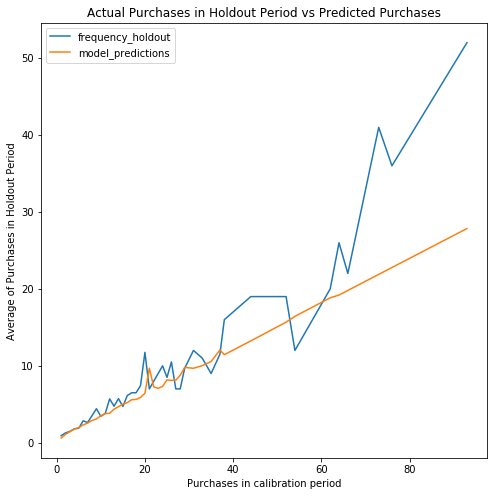

In [0]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

plot_calibration_purchases_vs_holdout_purchases(
  model, 
  input_pd, 
  n=90, 
  **{'figsize':(8,8)}
  )

display()

In [0]:
# add a field with the probability a customer is currently "alive"
filtered_pd['prob_alive']=model.conditional_probability_alive(
    filtered_pd['frequency'], 
    filtered_pd['recency'], 
    filtered_pd['T']
    )

filtered_pd.head(10)



Out[44]:

,frequency,recency,T,prob_alive
CustomerID,,,,
12347,6.0,365.0,367.0,0.997973
12348,3.0,283.0,358.0,0.989731
12352,6.0,260.0,296.0,0.995712
12356,2.0,303.0,325.0,0.989165
12358,1.0,149.0,150.0,0.874125
12359,5.0,324.0,331.0,0.997275
12360,2.0,148.0,200.0,0.982162
12362,12.0,292.0,295.0,0.998987
12363,1.0,133.0,242.0,0.760421


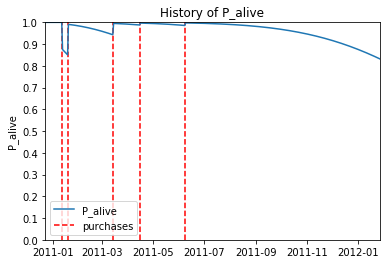

In [0]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

# clear past visualization instructions
plt.clf()

# customer of interest
CustomerID = '12383'

# grab customer's metrics and transaction history
cmetrics_pd = input_pd[input_pd['CustomerID']==CustomerID]
trans_history = orders_pd.loc[orders_pd['CustomerID'] == CustomerID]

# calculate age at end of dataset
days_since_birth = 400

# plot history of being "alive"
plot_history_alive(
  model, 
  days_since_birth, 
  trans_history, 
  'InvoiceDate'
  )

display()



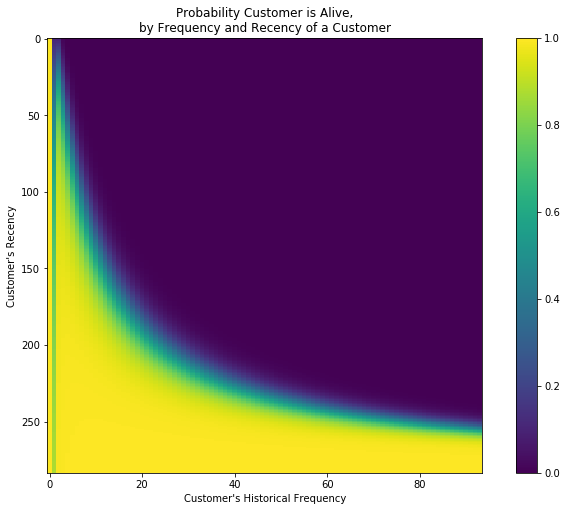

In [0]:
from lifetimes.plotting import plot_probability_alive_matrix

# set figure size
plt.subplots(figsize=(12, 8))

plot_probability_alive_matrix(model)

display()

In [0]:
filtered_pd['purchases_next30days']=(
  model.conditional_expected_number_of_purchases_up_to_time(
    30, 
    filtered_pd['frequency'], 
    filtered_pd['recency'], 
    filtered_pd['T']
    )
  )

filtered_pd.head(10)

Out[47]:

,frequency,recency,T,prob_alive,purchases_next30days
CustomerID,,,,,
12347,6.0,365.0,367.0,0.997973,0.501409
12348,3.0,283.0,358.0,0.989731,0.272737
12352,6.0,260.0,296.0,0.995712,0.613099
12356,2.0,303.0,325.0,0.989165,0.212422
12358,1.0,149.0,150.0,0.874125,0.226859
12359,5.0,324.0,331.0,0.997275,0.467091
12360,2.0,148.0,200.0,0.982162,0.331376
12362,12.0,292.0,295.0,0.998987,1.190125
12363,1.0,133.0,242.0,0.760421,0.127770


In [0]:
#6
frequency = 6
recency = 255
T = 300
t = 30

print('Probability of Alive: {0}'.format( model.conditional_probability_alive(frequency, recency, T) ))
print('Expected Purchases in next {0} days: {1}'.format(t, model.conditional_expected_number_of_purchases_up_to_time(t, frequency, recency, T) ))

Probability of Alive: 0.994775021178286
Expected Purchases in next 30 days: 0.604836561209966

In [0]:
import mlflow
import mlflow.pyfunc

# create wrapper for lifetimes model
class _lifetimesModelWrapper(mlflow.pyfunc.PythonModel):
  
    def __init__(self, lifetimes_model):
        self.lifetimes_model = lifetimes_model

    def predict(self, context, dataframe):
      
      # access input series
      frequency = dataframe.iloc[:,0]
      recency = dataframe.iloc[:,1]
      T = dataframe.iloc[:,2]
      
      # calculate probability currently alive
      results = pd.DataFrame( 
                  self.lifetimes_model.conditional_probability_alive(frequency, recency, T),
                  columns=['alive']
                  )
      # calculate expected purchases for provided time period
      results['purch_15day'] = self.lifetimes_model.conditional_expected_number_of_purchases_up_to_time(15, frequency, recency, T)
      results['purch_30day'] = self.lifetimes_model.conditional_expected_number_of_purchases_up_to_time(30, frequency, recency, T)
      results['purch_45day'] = self.lifetimes_model.conditional_expected_number_of_purchases_up_to_time(45, frequency, recency, T)
      
      return results[['alive', 'purch_15day', 'purch_30day', 'purch_45day']]

In [0]:
# add lifetimes to conda environment info

# save model run to mlflow
with mlflow.start_run(run_name='deployment run') as run:
  mlflow.pyfunc.log_model(
    'model', 
    python_model=_lifetimesModelWrapper(model), 
    conda_env=conda_env
    )

In [0]:
from pyspark.sql.types import ArrayType, FloatType

# define the schema of the values returned by the function
result_schema = ArrayType(FloatType())

# define function based on mlflow recorded model
probability_alive_udf = mlflow.pyfunc.spark_udf(
  spark, 
  'runs:/{0}/model'.format(run.info.run_id), 
  result_type=result_schema
  )

# register the function for use in SQL
_ = spark.udf.register('probability_alive', probability_alive_udf)

In [0]:
# create a temp view for SQL demonstration (next cell)
filtered.createOrReplaceTempView('customer_metrics')

# demonstrate function call on Spark DataFrame
display(
  filtered
    .withColumn(
      'predictions', 
      probability_alive_udf(filtered.frequency, filtered.recency, filtered.T)
      )
    .selectExpr(
      'customerid', 
      'predictions[0] as prob_alive', 
      'predictions[1] as purch_15day', 
      'predictions[2] as purch_30day', 
      'predictions[3] as purch_45day'
      )
  )

customerid,prob_alive,purch_15day,purch_30day,purch_45day
12347,0.99797314,0.25076118,0.5014089,0.7519466
12348,0.98973095,0.13640578,0.27273697,0.408998
12352,0.9957123,0.3066354,0.61309844,0.91940254
12356,0.989165,0.10624718,0.21242209,0.31852922
12358,0.8741251,0.11352927,0.22685899,0.3400131
12359,0.9972753,0.23360544,0.46709087,0.70046115
12360,0.9821618,0.1657738,0.3313764,0.4968219
12362,0.99898714,0.59521544,1.1901205,1.7847495
12363,0.7604207,0.06392301,0.12776983,0.19154686
12364,0.9942129,0.3948306,0.7890933,1.1828578


In [0]:
%sql -- predict probabiliies customer is alive and will return in 15, 30 & 45 days

SELECT
  x.CustomerID,
  x.prediction[0] as prob_alive,
  x.prediction[1] as purch_15day,
  x.prediction[2] as purch_30day,
  x.prediction[3] as purch_45day
FROM (
  SELECT
    CustomerID,
    probability_alive(frequency, recency, T) as prediction
  FROM customer_metrics
  ) x;

CustomerID,prob_alive,purch_15day,purch_30day,purch_45day
12347,0.99797314,0.25076118,0.5014089,0.7519466
12348,0.98973095,0.13640578,0.27273697,0.408998
12352,0.9957123,0.3066354,0.61309844,0.91940254
12356,0.989165,0.10624718,0.21242209,0.31852922
12358,0.8741251,0.11352927,0.22685899,0.3400131
12359,0.9972753,0.23360544,0.46709087,0.70046115
12360,0.9821618,0.1657738,0.3313764,0.4968219
12362,0.99898714,0.59521544,1.1901205,1.7847495
12363,0.7604207,0.06392301,0.12776983,0.19154686
12364,0.9942129,0.3948306,0.7890933,1.1828578
